## Imports and directory

In [1]:
!pip install wandb

import wandb
wandb.init()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.7 MB/s 
     |████████████████████████████████| 181 kB 57.0 MB/s 
     |████████████████████████████████| 157 kB 59.3 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 157 kB 62.6 MB/s 
     |████████████████████████████████| 157 kB 60.0 MB/s 
     |████████████████████████████████| 157 kB 55.9 MB/s 
     |████████████████████████████████| 157 kB 64.4 MB/s 
     |████████████████████████████████| 156 kB 65.8 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=6980e36b5c32a72ed3641eaf14c1b7d677968f902be80d4ab85bf64ccf853317
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [2]:
from fastai.callback.wandb import *
!pip install timm
import timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 509 kB 4.6 MB/s 


In [3]:
%env WANDB_PROJECT=[img2img]_sketch_to_art
%env WANDB_LOG_MODEL=true

env: WANDB_PROJECT=[img2img]_sketch_to_art
env: WANDB_LOG_MODEL=true


In [4]:
!nvidia-smi

Wed Aug 24 15:52:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
! [ -e /content ] && pip install -Uqq fastai

In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [7]:
from fastai.vision.all import *

from PIL import Image, ImageDraw, ImageFont
from torchvision.models import vgg19_bn

import random
import pandas as pd

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Downloads and Path

In [ ]:
!pwd

/content


In [ ]:
# !wget https://physiologie.unibe.ch/supplementals/delaunay.zip [Dont use this, dataset edited manually]
!cp drive/MyDrive/Datasets/DELAUNAY/data.zip ./data.zip 

In [ ]:
!unzip data.zip

In [ ]:
!mkdir ./DELAUNAY
!mv ./data/* ./DELAUNAY/art

mkdir: cannot create directory ‘./DELAUNAY’: File exists


In [ ]:
path = Path('./DELAUNAY')
path.ls()

(#2) [Path('DELAUNAY/art'),Path('DELAUNAY/sketches')]

In [ ]:
!mkdir ./DELAUNAY/sketches
path_Y = path/'art'
path_X = path/'sketches'

mkdir: cannot create directory ‘./DELAUNAY/sketches’: File exists


In [ ]:
path.ls()

(#2) [Path('DELAUNAY/art'),Path('DELAUNAY/sketches')]

## Data (Sketch Generation)

In [ ]:
images = get_image_files(path/"art")

In [ ]:
images.items[:5]

[Path('DELAUNAY/art/L†szl¢ Moholy-Nagy_144.jpg'),
 Path('DELAUNAY/art/Yves Klein_71.jpg'),
 Path('DELAUNAY/art/Leon Polk Smith_171.jpg'),
 Path('DELAUNAY/art/Antoine Pevsner_198.jpg'),
 Path('DELAUNAY/art/Jean Arp_133.jpg')]

In [ ]:
!ls ./DELAUNAY/art/data/

Testing Crappification on single image

True

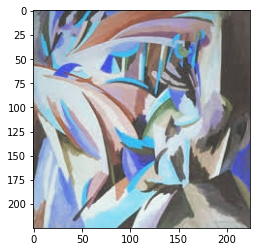

In [ ]:
import PIL
import cv2

img=cv2.imread(f'{path_Y}/Alberto Magnelli_132.jpg')
plt.imshow(img)
cv2.imwrite('img.png', img)

True

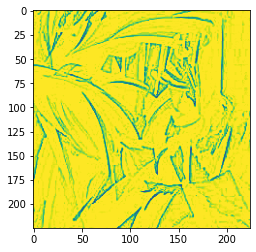

In [ ]:
k_size=7

grey_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to Grey Image
invert_img=cv2.bitwise_not(grey_img)            # Invert Image
blur_img=cv2.GaussianBlur(invert_img, (k_size,k_size),0) # Blur image
invblur_img=cv2.bitwise_not(blur_img)           # Invert Blurred Image
sketch_img=cv2.divide(grey_img,invblur_img, scale=256.0)  # Sketch Image

plt.imshow(sketch_img)
cv2.imwrite('sketch.png', sketch_img)

Crappification Logic

In [ ]:
def generate_sketch(filename):
    dest = path_X / filename.relative_to(path_Y)
    dest.parent.mkdir(parents=True, exist_ok=True)
    img = cv2.imread(str(filename))

    k_size = 7

    grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to Grey Image
    invert_img = cv2.bitwise_not(grey_img)            # Invert Image
    blur_img = cv2.GaussianBlur(invert_img, (k_size,k_size),0) # Blur image
    invblur_img = cv2.bitwise_not(blur_img)           # Invert Blurred Image
    sketch_img = cv2.divide(grey_img,invblur_img, scale=256.0)  # Sketch Image


    cv2.imwrite(str(dest), sketch_img)

In [ ]:
parallel(generate_sketch, images.items)

(#11503) [None,None,None,None,None,None,None,None,None,None...]

In [ ]:
!cp -r ./DELAUNAY/* drive/MyDrive/Datasets/DELAUNAY/sketch2art/

## Datasets

In [9]:
# !cp -r ./DELAUNAY/* drive/MyDrive/Datasets/DELAUNAY/sketch2art/
!mkdir ./DELAUNAY
!cp drive/MyDrive/Datasets/DELAUNAY/sketch2art/* -r ./DELAUNAY 

path = Path('./DELAUNAY')
path_Y = path/'art'
path_X = path/'sketches'
path.ls()

(#2) [Path('DELAUNAY/sketches'),Path('DELAUNAY/art')]

In [10]:
cv_items = get_image_files(path/'sketches')
cv_splitter = RandomSplitter(seed=42)
cv_split = cv_splitter(cv_items)
cv_label = lambda x: path_Y/x.name

In [11]:
class ImageResizer(Transform):
    order=1
    "Resize image to `size` using `resample`"
    def __init__(self, size, resample=BILINEAR):
        if not is_listy(size): size=(size,size)
        self.size,self.resample = (size[1],size[0]),resample

    def encodes(self, o:PILImage): return o.resize(size=self.size, resample=self.resample)
    def encodes(self, o:PILMask):  return o.resize(size=self.size, resample=NEAREST)

In [12]:
tfms = [[PILImage.create], [cv_label, PILImage.create]]
cv_dsets = Datasets(cv_items, tfms, splits=cv_split)
dls = cv_dsets.dataloaders(bs=8, 
                           after_item=[ImageResizer(256), ToTensor(), IntToFloatTensor()], # RandomResizedCrop(224, min_scale=0.3) 
                           after_batch=aug_transforms(do_flip=True, flip_vert=False, size=256) 
                           )

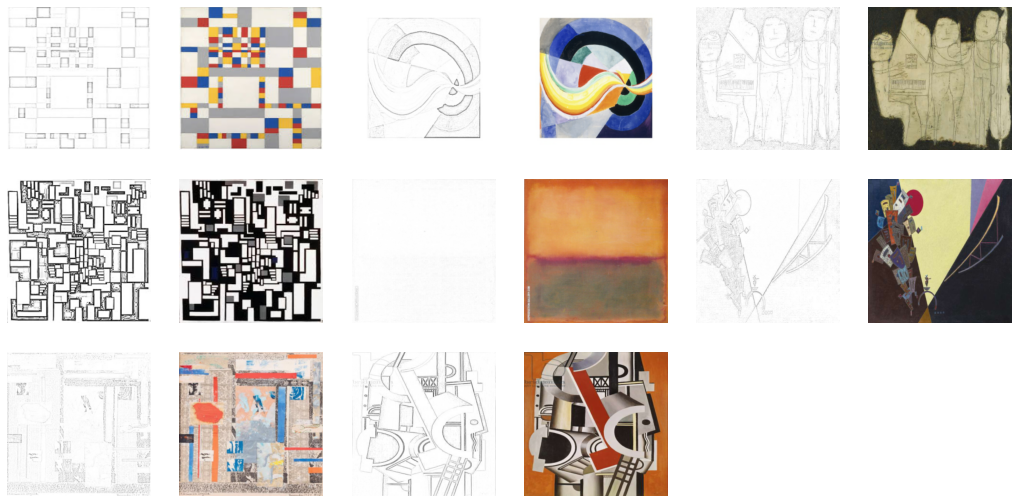

In [ ]:
dls.valid.show_batch(max_n=9, nrows=3)

## Model

In [13]:
type(dls.valid_ds[0][1])

fastai.vision.core.PILImage

In [14]:
# t = dls.valid_ds[0][1].data
# t = torch.stack([t,t])

In [15]:
def gram_matrix(x):
    n,c,h,w = x.size()
    x = x.view(n, c, -1)
    return (x @ x.transpose(1,2))/(c*h*w)

In [16]:
# gram_matrix(t)

In [17]:
base_loss = F.mse_loss

In [18]:
vgg_m = vgg19_bn(True).features.cuda().eval()
requires_grad(vgg_m)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

True

In [19]:
def children(m:nn.Module):
    "Get children of `m`."
    return list(m.children())

In [20]:
blocks = [i-1 for i,o in enumerate(children(vgg_m)) if isinstance(o,nn.MaxPool2d)]
blocks, [vgg_m[i] for i in blocks]

([5, 12, 25, 38, 51],
 [ReLU(inplace=True),
  ReLU(inplace=True),
  ReLU(inplace=True),
  ReLU(inplace=True),
  ReLU(inplace=True)])

In [21]:
class FeatureLoss(nn.Module):
    def __init__(self, m_feat, layer_ids, layer_wgts):
        super().__init__()
        self.m_feat = m_feat
        self.loss_features = [self.m_feat[i] for i in layer_ids]
        self.hooks = hook_outputs(self.loss_features, detach=False)
        self.wgts = layer_wgts
        self.metric_names = ['pixel',] + [f'feat_{i}' for i in range(len(layer_ids))
              ] + [f'gram_{i}' for i in range(len(layer_ids))]

    def make_features(self, x, clone=False):
        self.m_feat(x)
        return [(o.clone() if clone else o) for o in self.hooks.stored]
    
    def forward(self, input, target):
        out_feat = self.make_features(target, clone=True)
        in_feat = self.make_features(input)
        self.feat_losses = [base_loss(input,target)]
        self.feat_losses += [base_loss(f_in, f_out)*w
                             for f_in, f_out, w in zip(in_feat, out_feat, self.wgts)]
        self.feat_losses += [base_loss(gram_matrix(f_in), gram_matrix(f_out))*w**2 * 5e3
                             for f_in, f_out, w in zip(in_feat, out_feat, self.wgts)]
        self.metrics = dict(zip(self.metric_names, self.feat_losses))
        return sum(self.feat_losses)
    
    def __del__(self): self.hooks.remove()

In [22]:
feat_loss = FeatureLoss(vgg_m, blocks[2:5], [5,15,2])

## Train

In [23]:
wd = 1e-3
learn = unet_learner(dls, models.resnet34, wd=wd, loss_func=feat_loss, # 'convnext_tiny_in22k' not working: 'str' object is not callable
                     blur=True, norm_type=NormType.Spectral, 
                     cbs=WandbCallback(), self_attention=True, 
                     y_range=(-3, 3), n_out=3).to_fp16()

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [25]:
learn.summary()

KeyError: ignored

In [ ]:
learn

In [ ]:
!mkdir path/'models'
#!cp camvid/images_pruned/models/2_inpainting_perceptual_text.pth drive/My\ Drive/Object\ deletion/
!cp drive/My\ Drive/Object\ deletion/2_inpainting_perceptual.pth camvid/images_pruned/models/
learn.load('2_inpainting_perceptual')

SuggestedLRs(valley=0.019054606556892395)

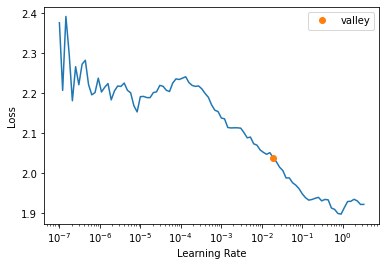

In [ ]:
learn.lr_find()

In [ ]:
lr = 1e-2

In [ ]:
learn.fit_one_cycle(10, slice(lr), pct_start=0.9)

In [ ]:
learn.save('1a')

Path('models/1a.pth')

In [27]:
!mkdir ./models
# !cp models/1a.pth drive/MyDrive/Colab\ Notebooks/models/sketch2img_1a.pth
!cp drive/MyDrive/Colab\ Notebooks/models/sketch2img_1a.pth models/1a.pth

In [28]:
learn.load('1a')

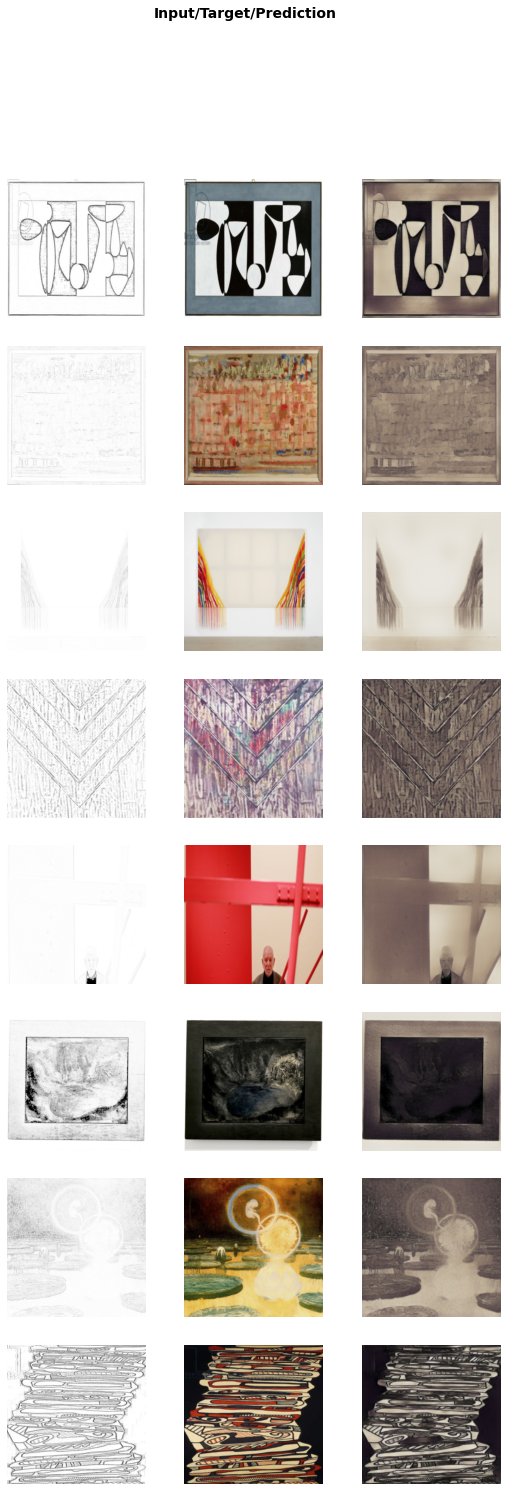

In [ ]:
learn.show_results()

In [ ]:
learn.show_results()

In [ ]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


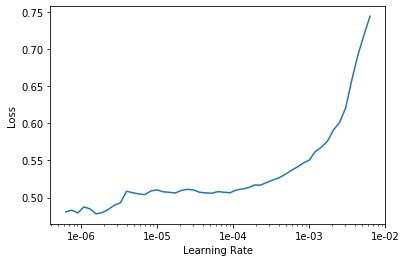

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
dir(wandb)

['AlertLevel',
 'Api',
 'Artifact',
 'Audio',
 'Classes',
 'CommError',
 'Config',
 'Error',
 'Graph',
 'Histogram',
 'Html',
 'Image',
 'InternalApi',
 'JoinedTable',
 'Molecule',
 'Object3D',
 'Optional',
 'Plotly',
 'PublicApi',
 'START_TIME',
 'Settings',
 'Table',
 'UsageError',
 'Video',
 '_IS_INTERNAL_PROCESS',
 '__all__',
 '__annotations__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_assert_is_internal_process',
 '_assert_is_user_process',
 '_attach',
 '_globals',
 '_lazyloader',
 '_preinit',
 '_set_internal_process',
 '_teardown',
 '_wandb_module',
 'agent',
 'agents',
 'alert',
 'api',
 'apis',
 'attach',
 'catboost',
 'config',
 'controller',
 'data_types',
 'define_metric',
 'docker',
 'ensure_configured',
 'env',
 'errors',
 'filesync',
 'finish',
 'get_ipython',
 'gym',
 'helper',
 'init',
 'integration',
 'join',
 'jupyter',
 'keras',
 'lightgbm',
 'load_ipython_extensi

In [ ]:
wandb.finish()

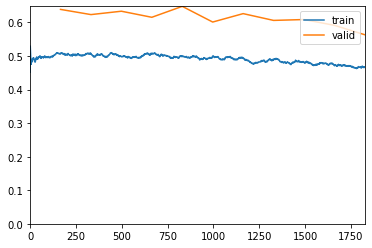

In [ ]:
learn.fit_one_cycle(11, slice(1e-6, 1e-5), pct_start=0.9)

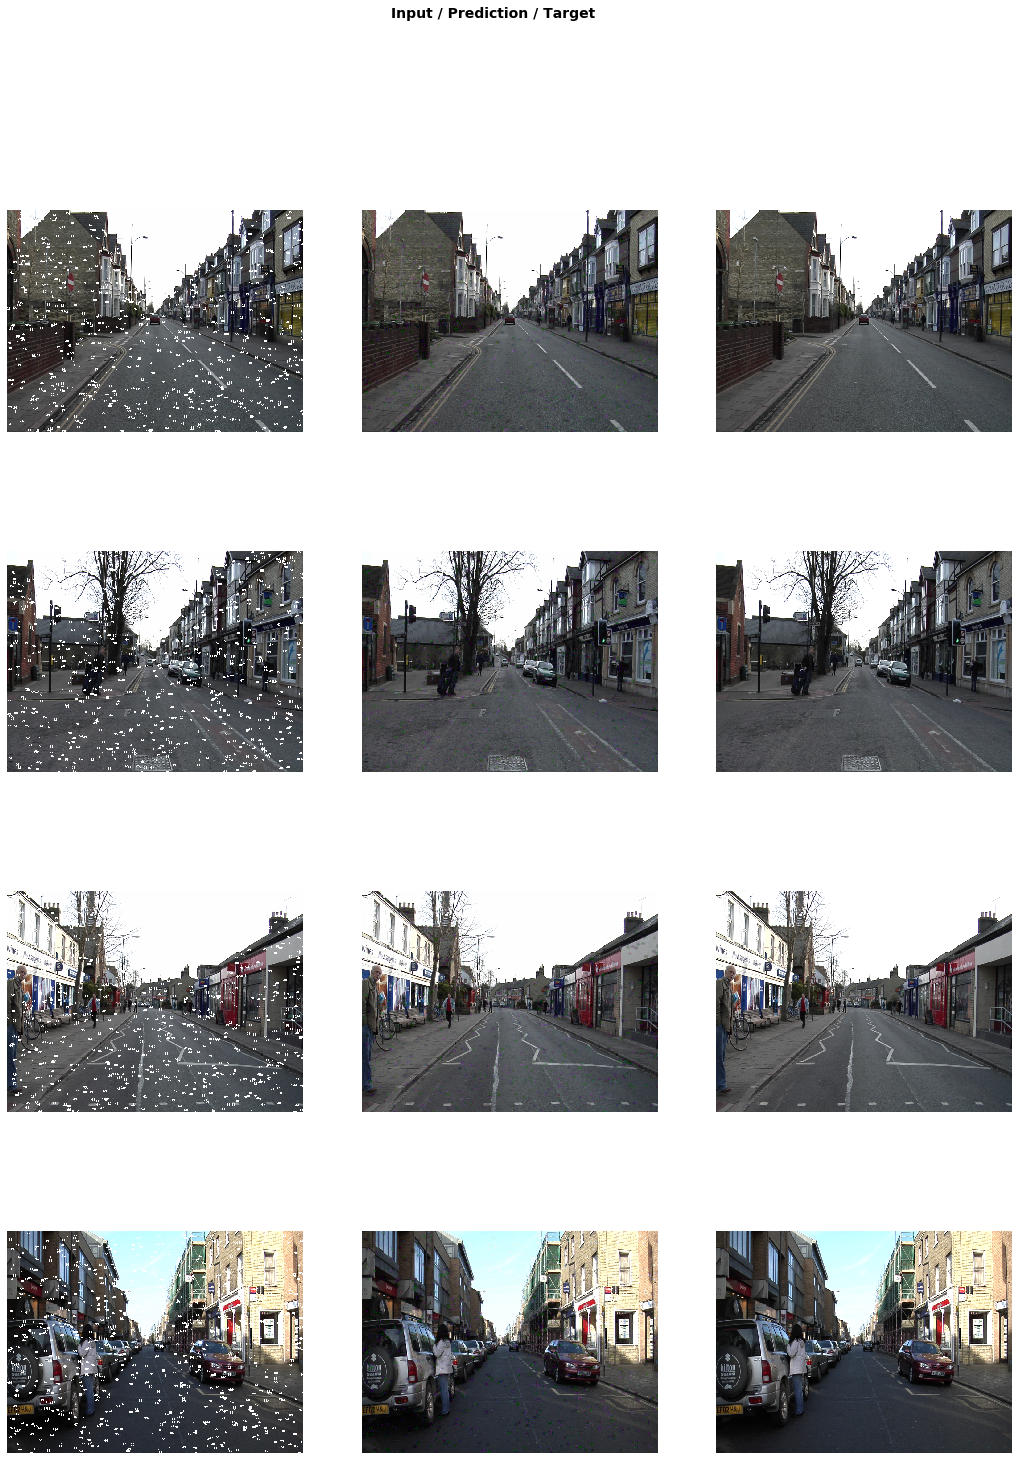

In [ ]:
learn.show_results(rows=5, imgsize=6)

In [ ]:
learn.save('2_inpainting_perceptual_text')

In [ ]:
#!mkdir camvid/images_pruned/models
!cp camvid/images_pruned/models/2_inpainting_perceptual_text.pth drive/My\ Drive/Object\ deletion/
#!cp drive/My\ Drive/Object\ deletion/2_inpainting_perceptual.pth camvid/images_pruned/models/

mkdir: cannot create directory ‘camvid/images_pruned/models’: File exists


In [ ]:
learn.load('2_inpainting_perceptual')

Learner(data=ImageDataBunch;

Train: LabelList (666 items)
x: ImageImageList
Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960)
y: ImageList
Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960)
Path: camvid/images_pruned;

Valid: LabelList (35 items)
x: ImageImageList
Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960)
y: ImageList
Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960)
Path: camvid/images_pruned;

Test: None, model=DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(

## Export Learner

In [ ]:
learn = learn.to_fp32()
learn.freeze()
learn.export('2_inpainting_perceptual.pkl')

In [ ]:
learn.summary()

DynamicUnet
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 360, 480]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 360, 480]       128        True      
______________________________________________________________________
ReLU                 [64, 360, 480]       0          False     
______________________________________________________________________
MaxPool2d            [64, 180, 240]       0          False     
______________________________________________________________________
Conv2d               [64, 180, 240]       36,864     True      
______________________________________________________________________
BatchNorm2d          [64, 180, 240]       128        True      
______________________________________________________________________
ReLU                 [64, 180, 240]       0          False     
__________________________________________________

In [ ]:
!cp camvid/images_pruned/models/2_inpainting_perceptual.pth drive/My\ Drive/Object\ deletion/
!cp camvid/images_pruned/2_inpainting_perceptual.pkl drive/My\ Drive/Object\ deletion/

In [ ]:
ls drive/My\ Drive/Object\ deletion/

1_Segmentation-fp16.ipynb  camvid/           segmentation_crap.ipynb
1_Segmentation.ipynb       Inpainting.ipynb
2_Inpainting.ipynb         ReadMe.gdoc


## Inference time

In [ ]:
"Restart Runtime"
import os

def restart_runtime():
  os.kill(os.getpid(), 9)
restart_runtime()

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *


class FeatureLoss(nn.Module):
    def __init__(self, m_feat, layer_ids, layer_wgts):
        super().__init__()
        self.m_feat = m_feat
        self.loss_features = [self.m_feat[i] for i in layer_ids]
        self.hooks = hook_outputs(self.loss_features, detach=False)
        self.wgts = layer_wgts
        self.metric_names = ['pixel',] + [f'feat_{i}' for i in range(len(layer_ids))
              ] + [f'gram_{i}' for i in range(len(layer_ids))]

    def make_features(self, x, clone=False):
        self.m_feat(x)
        return [(o.clone() if clone else o) for o in self.hooks.stored]
    
    def forward(self, input, target):
        out_feat = self.make_features(target, clone=True)
        in_feat = self.make_features(input)
        self.feat_losses = [base_loss(input,target)]
        self.feat_losses += [base_loss(f_in, f_out)*w
                             for f_in, f_out, w in zip(in_feat, out_feat, self.wgts)]
        self.feat_losses += [base_loss(gram_matrix(f_in), gram_matrix(f_out))*w**2 * 5e3
                             for f_in, f_out, w in zip(in_feat, out_feat, self.wgts)]
        self.metrics = dict(zip(self.metric_names, self.feat_losses))
        return sum(self.feat_losses)
    
    def __del__(self): self.hooks.remove()
  
  
path = '/content/drive/My Drive/Object deletion/'
learn = load_learner(path = path, file = '2_inpainting_perceptual.pkl')


img = open_image('/content/drive/My Drive/Object deletion/0006R0_f03420.png')
pred = learn.predict(img)

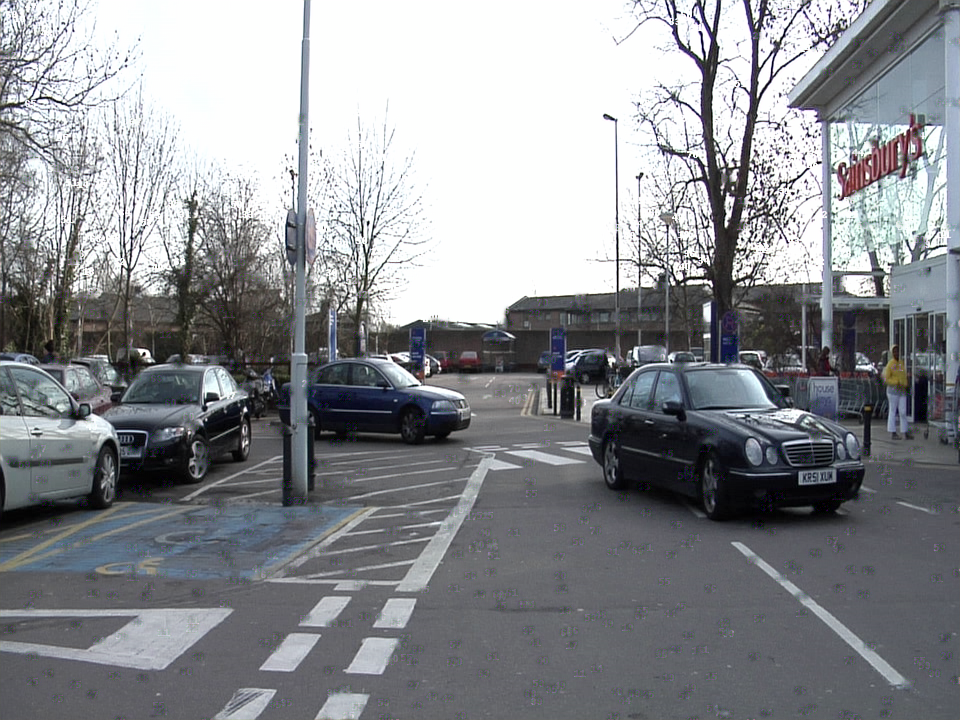

In [ ]:
pred[0]